# Visualização usando UMAP

In [1]:
import os

os.chdir('../../../')
os.getcwd()

'/Users/brunogutierrez/workspace/tese'

In [2]:
import umap
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem.snowball import SnowballStemmer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
from src.Dataloaders.b2w_dataset import B2W
from src.text_preprocessing import TextPreprocessing
from src.text_representation import *
from src.regex_review_classification import *

In [4]:
%%time
b2w = B2W()
b2w.pre_process()
df = b2w.df.sample(frac=0.2)

2023 linhas deletadas por terem menos de 3 palavras
2179 linhas deletadas por terem reviews iguais
CPU times: user 3.09 s, sys: 370 ms, total: 3.46 s
Wall time: 3.95 s


## Pré Processamento

In [5]:
text_preprocessor = TextPreprocessing(df, 'full_review')

In [6]:
%%time
df = text_preprocessor.pre_process()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunogutierrez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 17.9 s, sys: 332 ms, total: 18.2 s
Wall time: 25.1 s


In [7]:
 df['text_preprocessed'].sample(3)

75359    [pessim, pinc, sao, pessim, qualidad, cust, ca...
31068    [entreg, sup, rap, atend, excelent, extensor, ...
80180    [vei, aut, falant, ruim, compr, mes, pass, vei...
Name: text_preprocessed, dtype: object

In [8]:
df['clean_text'].sample(3).values

array(['bom dia compr perfum cheg abert lacr nao dur corp compr perfum porqu ja uso muit anos ache confiavel compr sit perfum joop cheg abert lacr nao dur corp decepcion sit american falsific acho',
       'gost aparelh traz charm antig pen so coloc disc cad vez',
       'excelent robust facil limp lindoxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'],
      dtype=object)

## TF-IDF word representation

In [9]:
# max_df=0.95
vectorizer_min = TfidfVectorizer(min_df=0.005)
x_min = vectorizer_min.fit_transform(df["clean_text"])
vocabulary_min = vectorizer_min.get_feature_names_out()
print(x_min.shape)

(25620, 446)


In [10]:
corpus = x_min

### Classificação com base em regex

In [11]:
df = regex_classification(df.copy())
df['review_class'].value_counts()

produto                                7497
produto-prazo                          5634
Nao identificado                       3886
prazo                                  2792
atendimento-produto-prazo              1515
atendimento-produto                    1322
atendimento                             668
atendimento-prazo                       589
produto-prazo-embalagem                 455
produto-embalagem                       432
embalagem                               270
prazo-embalagem                         219
atendimento-produto-prazo-embalagem     163
atendimento-produto-embalagem            86
atendimento-prazo-embalagem              51
atendimento-embalagem                    41
Name: review_class, dtype: int64

#### Com o UMAP:

In [12]:
%%time
reducer = umap.UMAP()
x_umap = reducer.fit_transform(corpus)

CPU times: user 2min 44s, sys: 2.29 s, total: 2min 46s
Wall time: 2min 32s


In [13]:
df["umpa_x_100"] = list(x_umap[:,0])
df["umpa_y_100"] = list(x_umap[:,1])

In [14]:
df_plot = df[df['review_class'].isin(df['review_class'].value_counts().index[:6])]
# df_plot = df[df['dimensao'].isin(dimensoes)]

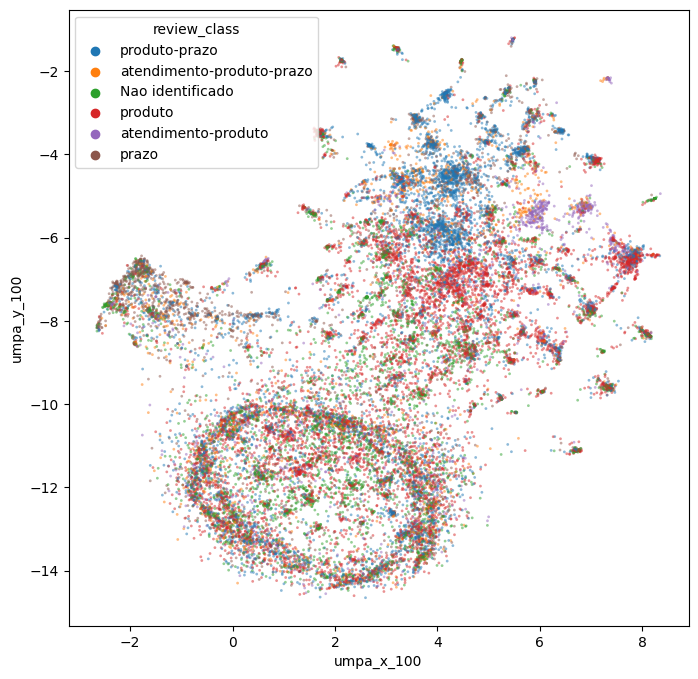

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="umpa_x_100", y="umpa_y_100", hue="review_class", data=df_plot, 
                linewidth=0, ax=ax, s=4, alpha=.5, legend='full')
plt.show()

Uma outra abordagem seria usar um algoritmo de clusterização para descobrir quais são os top termos de cada grupo.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html